In [1]:
# libraries 
import pandas as pd
import numpy as np

from itertools import combinations
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install xgboost

In [3]:
# !pip install lightgbm

In [4]:
# load data
df = pd.read_csv('/Users/lilyliang/Downloads/447 notes/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# check if there are duplicate rows 
print(df.duplicated().sum())

print("before:",df.shape)
df = df.drop_duplicates()

print("after:",df.shape)
print(df.duplicated().sum())

1
before: (303, 14)
after: (302, 14)
0


In [6]:
# checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

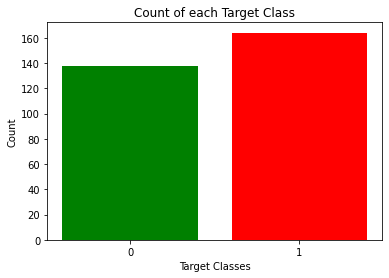

In [7]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

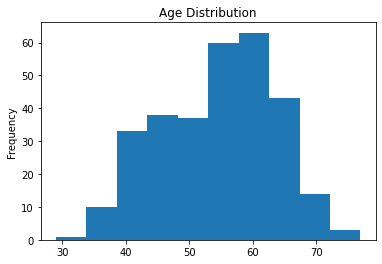

In [8]:
df['age'].plot(kind='hist',title='Age Distribution')

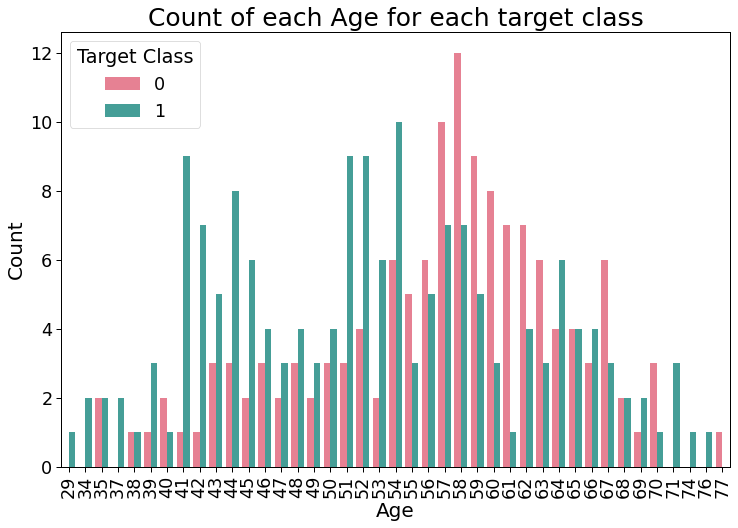

In [9]:
# Set plot context
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})

# Plotting age vs target
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age', hue='target', palette='husl')
plt.title('Count of each Age for each target class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target Class')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# most people in the age group of 57 - 62 have heart diseases

In [10]:
# # Set font
# sns.set(font_scale=1.5)
# plt.rcParams.update({'font.size': 14})

# # Plotting age vs target
# plt.figure(figsize=(12, 8))
# sns.countplot(data=df, x='age', hue='target', palette='husl')
# plt.title('Count of each Age for each target class')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.legend(title='Target Class', loc='upper right', bbox_to_anchor=(1.25, 1))
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()


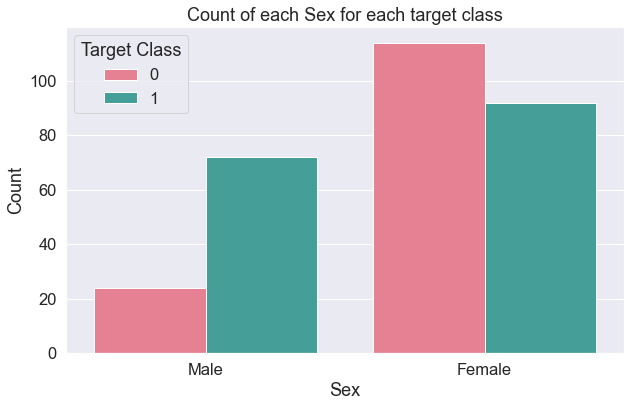

In [11]:
# Set font
sns.set(font_scale=1.5)
plt.rcParams.update({'font.size': 14})

# Plotting distribution of sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='target', palette='husl')
plt.title('Count of each Sex for each target class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Target Class')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])  # Set x-axis labels
plt.show()

# most males suffer from heart disease since the ratio is 70:25 so there must be a common factor btw them
# while females have a higher chance of not getting it but there is a relatively balanced distribution 

<Figure size 1440x3600 with 0 Axes>

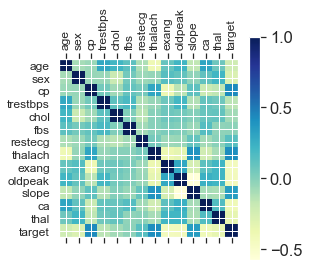

In [12]:
# Adjust the size of the figure
plt.figure(figsize=(20, 50))

# Plot the correlation matrix
plt.matshow(df.corr(), cmap="YlGnBu")

# Set ticks with proper spacing
plt.yticks(np.arange(df.shape[1]), df.columns, fontsize=12)
plt.xticks(np.arange(df.shape[1]), df.columns, rotation=90, fontsize=12)

# Add colorbar
plt.colorbar()

# Show plot
plt.show()

# Positive correlations: Chest pain and target which menas higher CP = higher # of ppl gettng heart disease,
# restecg, thalach, and slope

# Negative correlation: exang, oldpeakm, ca, thal

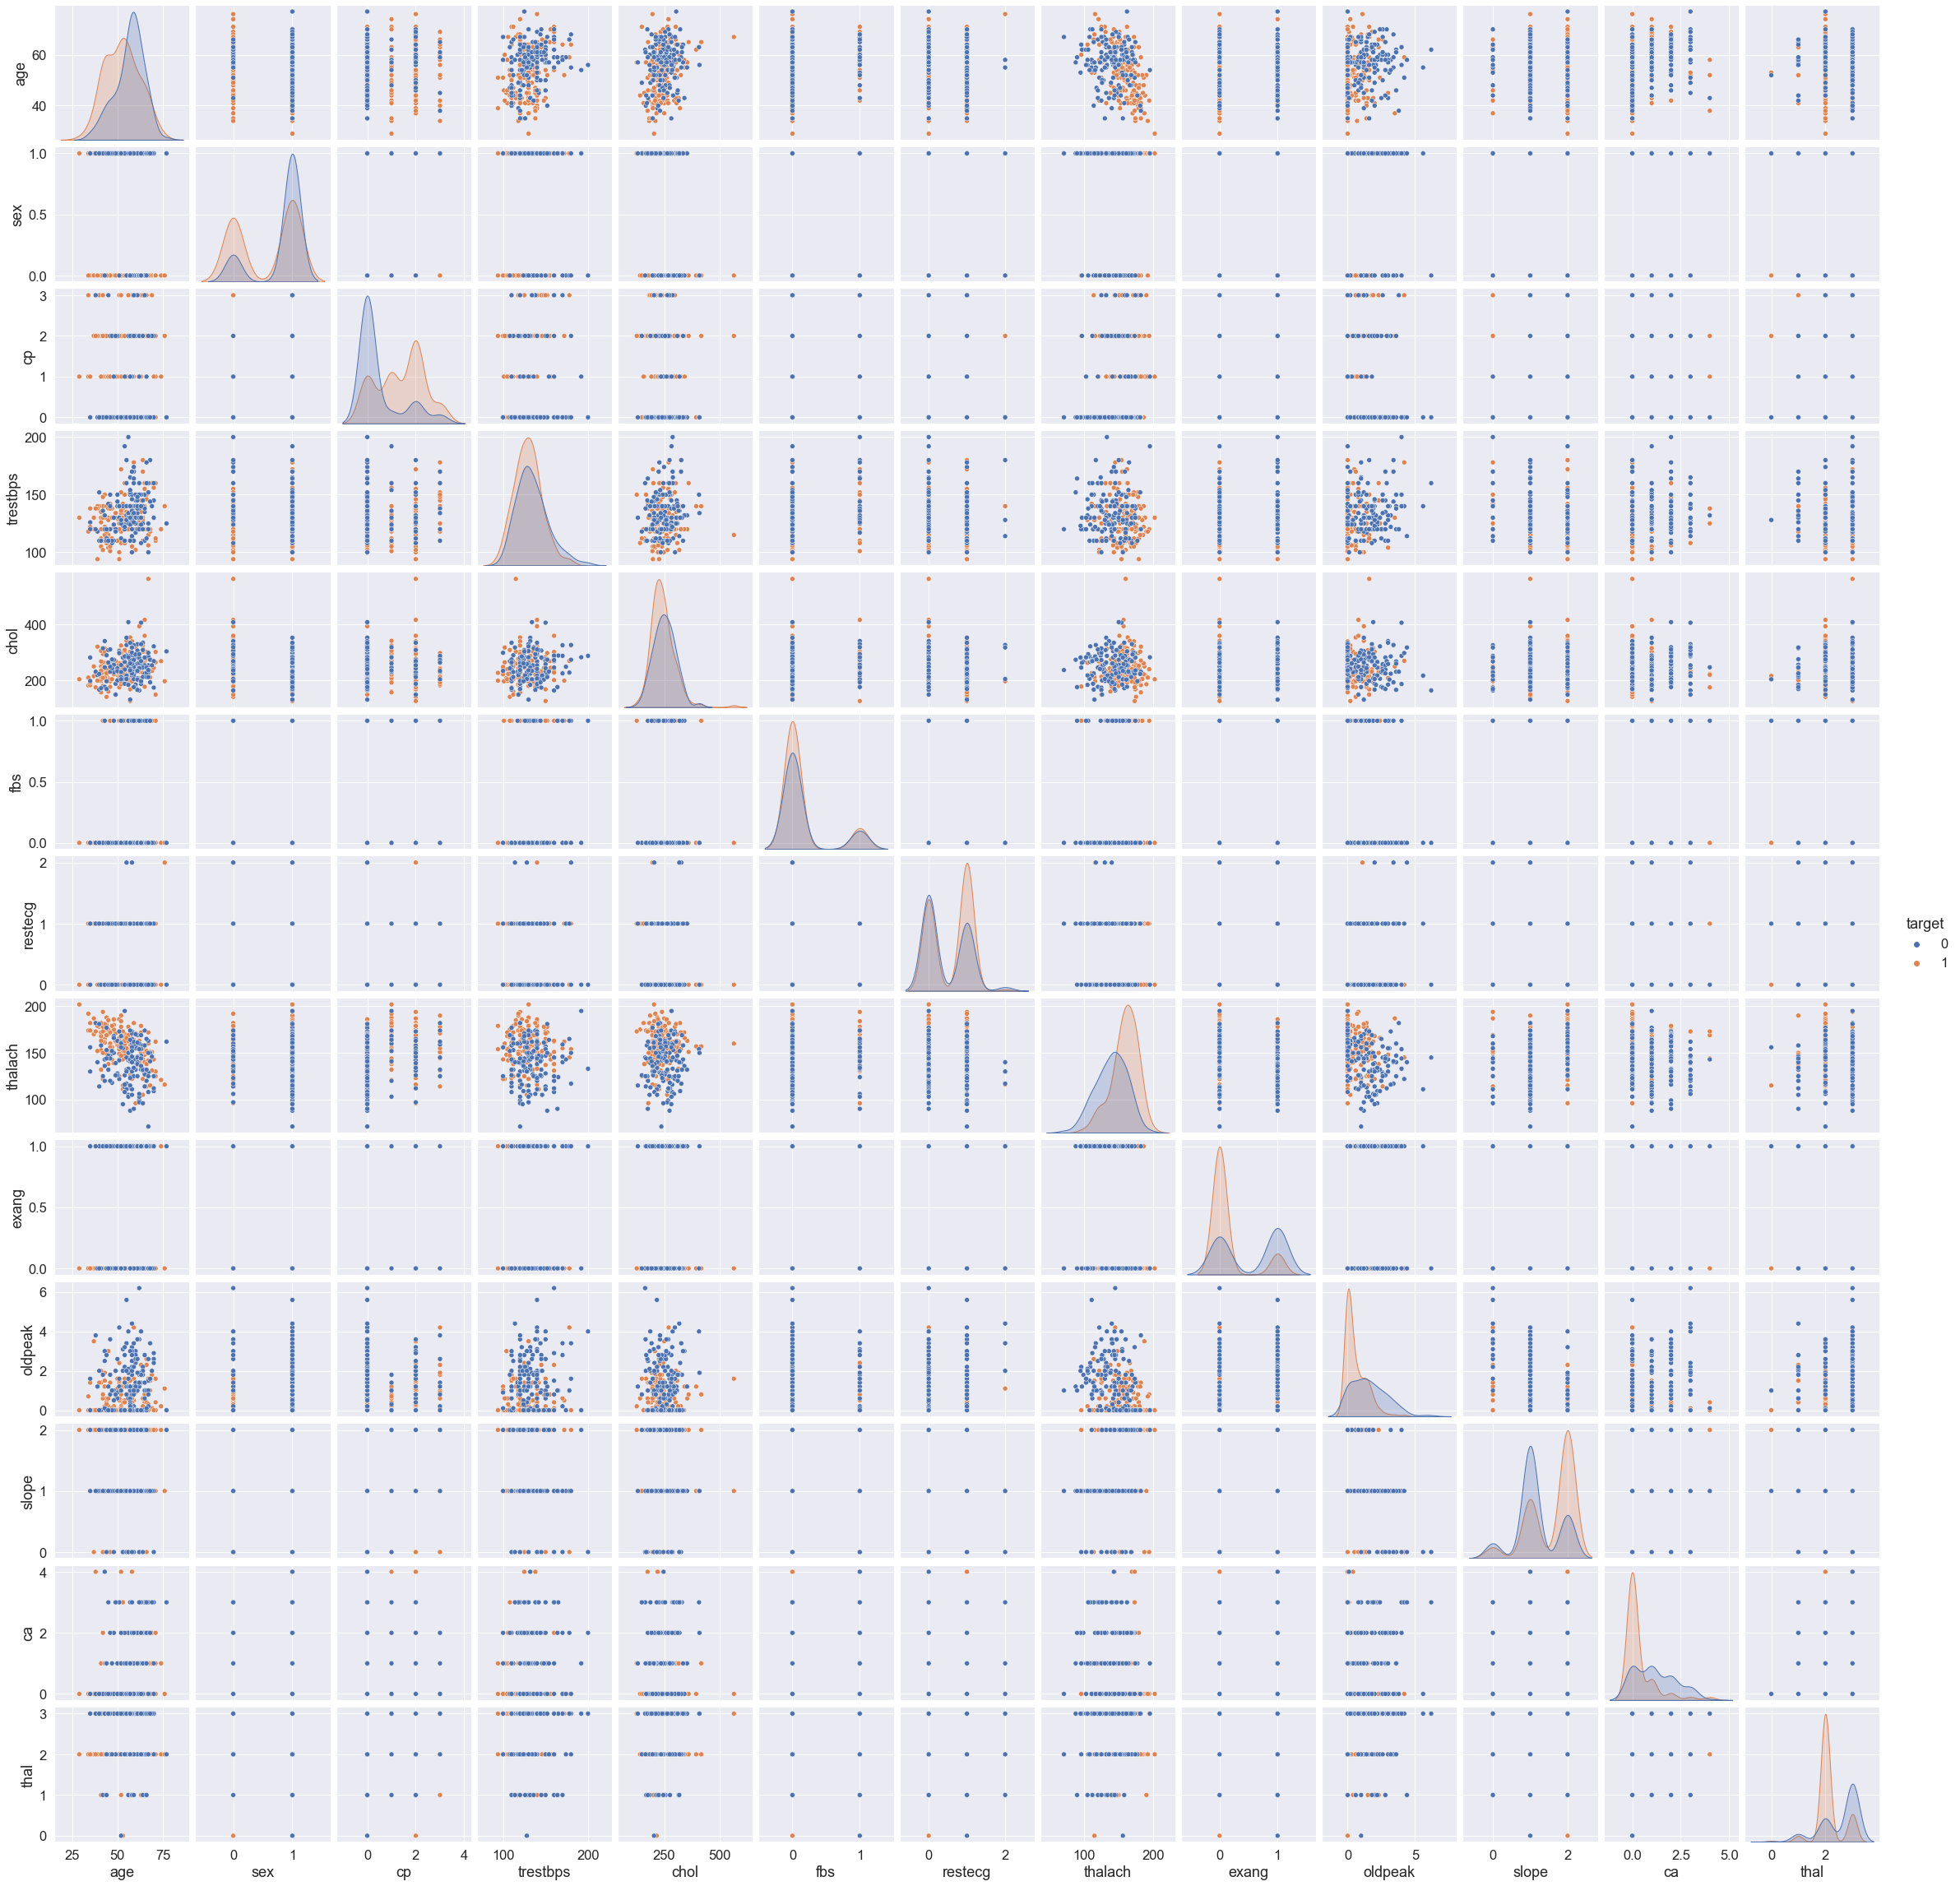

In [13]:
sns.pairplot(df, hue='target');

In [14]:
# df['restecg'] thalach, and slope
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
# explore the positive correlation varibles: cp, restecg, thalach, and slope

In [16]:
df['cp'].unique()

array([3, 2, 1, 0])

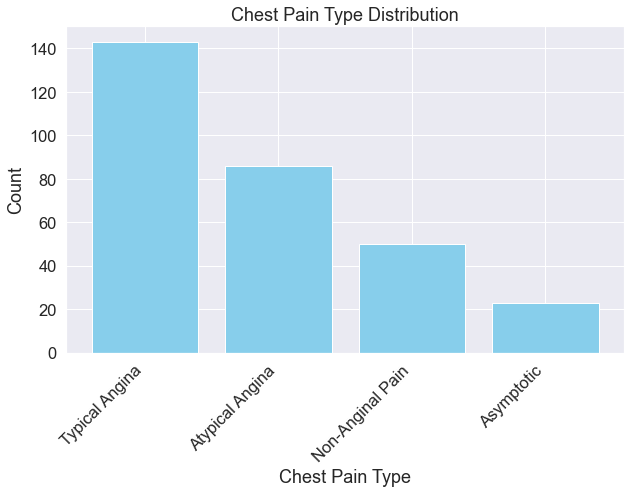

In [17]:
# Chest Pain Type Distribution
chest_pain_types = {
    1: "Typical Angina",
    2: "Atypical Angina",
    3: "Non-Anginal Pain",
    4: "Asymptotic"
}

# Count the occurrences of each chest pain type
chest_pain_counts = df['cp'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(chest_pain_types.values(), chest_pain_counts, color='skyblue')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


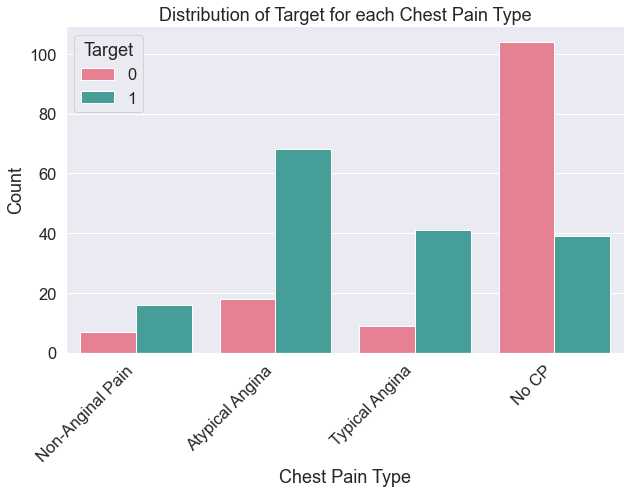

In [18]:
# Define the labels for chest pain types
chest_pain_types = {
    0: "No CP",
    1: "Typical Angina",
    2: "Atypical Angina",
    3: "Non-Anginal Pain",
    4: "Asymptotic"
}

# Map the chest pain types to their corresponding labels
df['chest_pain_type_label'] = df['cp'].map(chest_pain_types)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='chest_pain_type_label', hue='target', palette='husl')
plt.title('Distribution of Target for each Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Target')
plt.show()

# no chest pain is highly correlated with no heart disease which makes sense 
# however those who dont exp CP have the same likelyhood as those who exp typical angina 

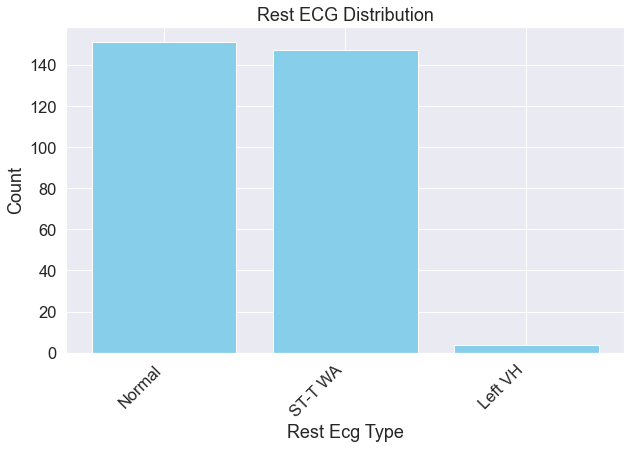

In [19]:
# rest ecg Distribution
rest_types = {
    0: 'Normal',
    1: 'ST-T WA',
    2: 'Left VH'
}

# Count the occurrences of each chest pain type
rest_types_counts = df['restecg'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rest_types.values(), rest_types_counts, color='skyblue')
plt.title('Rest ECG Distribution')
plt.xlabel('Rest Ecg Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


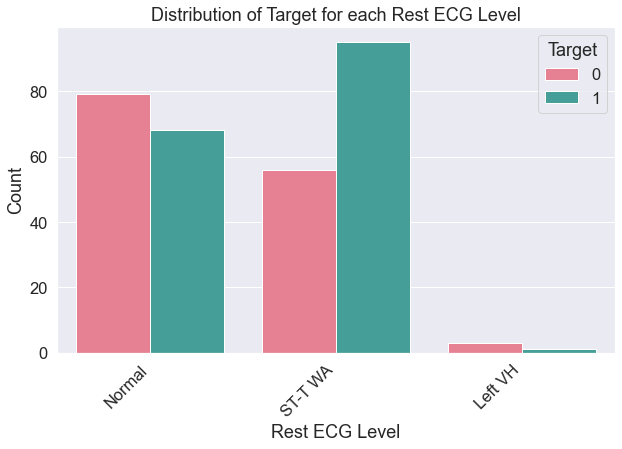

In [20]:
# Define the labels for rest ecg levels
rest_ecg_levels = {
    0: 'Normal',
    1: 'ST-T WA',
    2: 'Left VH'
}

# Map the rest ecg levels to their corresponding labels
df['rest_ecg_label'] = df['restecg'].map(rest_ecg_levels)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rest_ecg_label', hue='target', palette='husl')
plt.title('Distribution of Target for each Rest ECG Level')
plt.xlabel('Rest ECG Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Target')
plt.show()

# interestly, enough left VH is a more serious condition compared to ST-T wave abnormalities but for this case 
# it seems that there are very few ppl who have/don't have HD 
# the biggest group that has HD are in who have ST-T wave abnormalities and those who have normal ECGs have more ppl 
# who dont have it but it's still likely for them to get HD

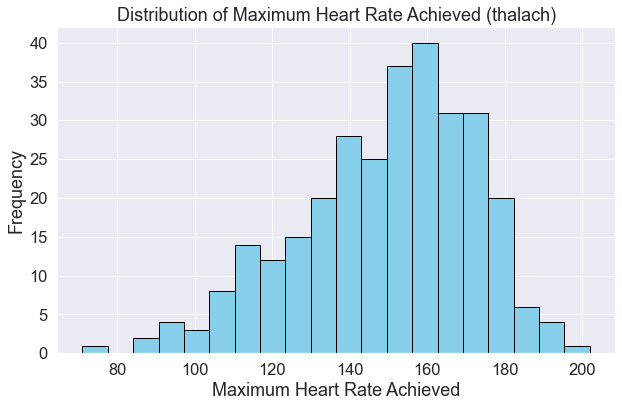

In [21]:
# Create a histogram for 'thalach'
plt.figure(figsize=(10, 6))
plt.hist(df['thalach'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Maximum Heart Rate Achieved (thalach)')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

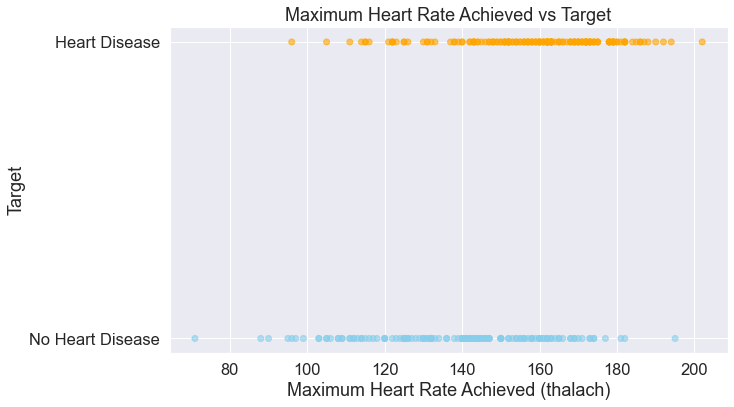

In [22]:
# Create a scatter plot of thalach vs target
plt.figure(figsize=(10, 6))
plt.scatter(df['thalach'], df['target'], color=['skyblue' if target == 0 else 'orange' for target in df['target']], alpha=0.6)
plt.title('Maximum Heart Rate Achieved vs Target')
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Target')
plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.grid(True)
plt.show()

# those who have max heart rates btw 135 to 175 are more likely to have heart diseases 

In [23]:
df['slope'].unique()

array([0, 2, 1])

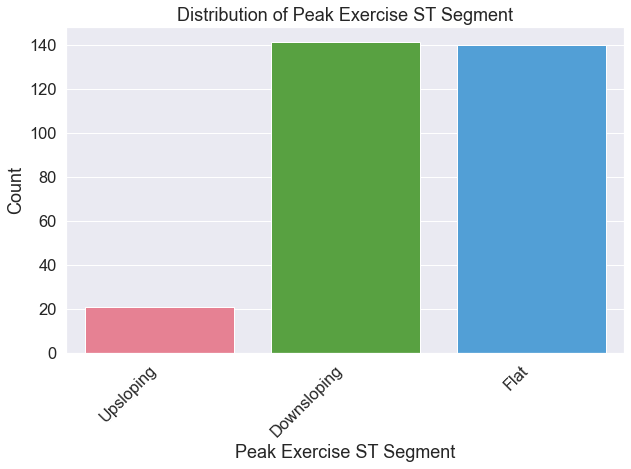

In [24]:
# Define the labels for peak exercise ST segment
peak_st_labels = {
    0: "Upsloping",
    1: "Flat",
    2: "Downsloping"
}

# Map the peak exercise ST segment to their corresponding labels
df['peak_st_label'] = df['slope'].map(peak_st_labels)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='peak_st_label', palette='husl')
plt.title('Distribution of Peak Exercise ST Segment')
plt.xlabel('Peak Exercise ST Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# a lot of the patients in this dataset have downsloping and flat ecg readings which are both bad despite downsloping
# being worse it's slightly higher by a bit

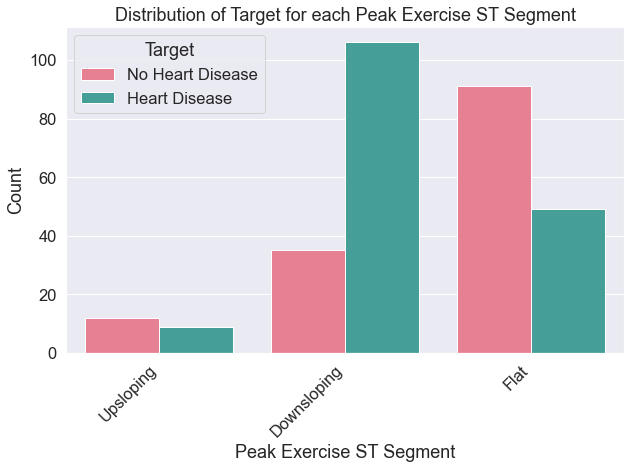

In [25]:
# Define the labels for peak exercise ST segment
peak_st_labels = {
    0: "Upsloping",
    1: "Flat",
    2: "Downsloping"
}

# Map the peak exercise ST segment to their corresponding labels
df['peak_st_label'] = df['slope'].map(peak_st_labels)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='peak_st_label', hue='target', palette='husl')
plt.title('Distribution of Target for each Peak Exercise ST Segment')
plt.xlabel('Peak Exercise ST Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

# downsloping is more concerning and is strongly associated with myocardial ischemia and a higher risk of HD hence 
# why it has the most patients with HD and for flat, most patients dont have HD but it is still a risk of getting it

In [26]:
# exolore Negative correlation: exang, oldpeak, ca, thal

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chest_pain_type_label,rest_ecg_label,peak_st_label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Non-Anginal Pain,Normal,Upsloping
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Atypical Angina,ST-T WA,Upsloping
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Typical Angina,Normal,Downsloping
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Typical Angina,ST-T WA,Downsloping
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,No CP,ST-T WA,Downsloping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,No CP,ST-T WA,Flat
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Non-Anginal Pain,ST-T WA,Flat
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,No CP,ST-T WA,Flat
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,No CP,ST-T WA,Flat


In [28]:
df['exang'].unique()

array([0, 1])

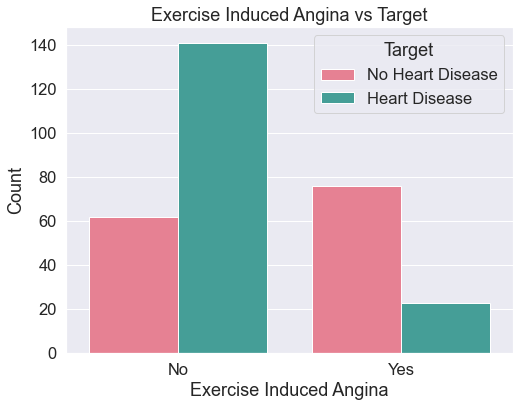

In [29]:
# Define the labels for exercise induced angina
angina_labels = {
    0: "No",
    1: "Yes"
}

# Map the exercise induced angina to their corresponding labels
df['angina_label'] = df['exang'].map(angina_labels)

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='angina_label', hue='target', palette='husl')
plt.title('Exercise Induced Angina vs Target')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for better readability
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

# if a patient doesnt experience exercide induced angina then they are more likely to get HD and vis versa

In [30]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

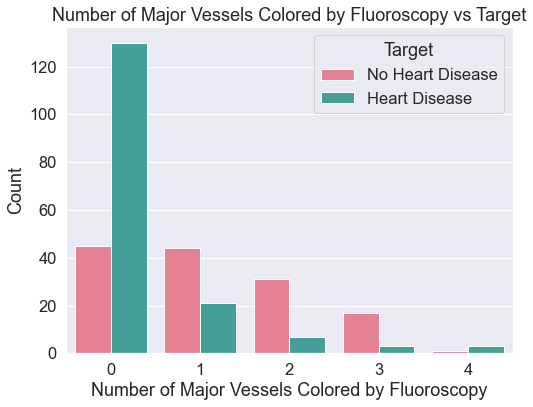

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ca', hue='target', palette='husl')
plt.title('Number of Major Vessels Colored by Fluoroscopy vs Target')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()
# shows a major negative correlation

In [32]:
df['thal'].unique()
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

array([1, 2, 3, 0])

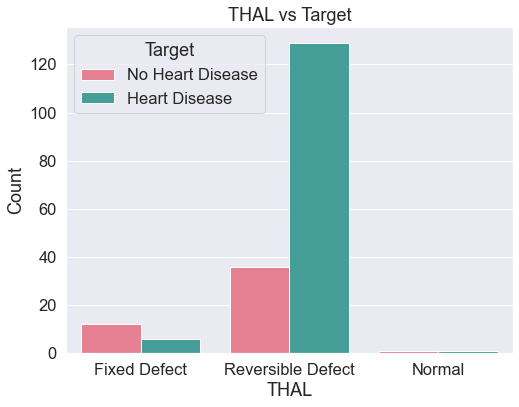

In [33]:
# Define the labels for THAL
thal_labels = {
    0: "Normal",
    1: "Fixed Defect",
    2: "Reversible Defect"
}

# Map the THAL variable to their corresponding labels
df['thal_label'] = df['thal'].map(thal_labels)

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='thal_label', hue='target', palette='husl')
plt.title('THAL vs Target')
plt.xlabel('THAL')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

# those who have reversibke defects are more likely to delevep HD

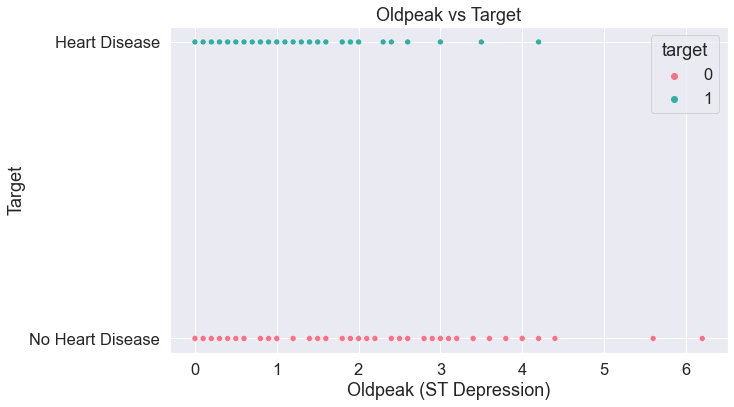

In [34]:
# Create a scatter plot of oldpeak vs target
# ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='oldpeak', y='target', hue='target', palette='husl')
plt.title('Oldpeak vs Target')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Target')
plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.grid(True)
plt.show()


In [35]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'chest_pain_type_label',
 'rest_ecg_label',
 'peak_st_label',
 'angina_label',
 'thal_label']

In [36]:
selected_features = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [37]:
X = df[selected_features] # features

y = df['target'] # target values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [39]:
# LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.868852


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Create the logistic regression model
model = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score: 0.833843537414966
Accuracy Score on Test Set: 0.8688524590163934


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

true-negitive: 22 
false-positive: 5 
false-negative: 3 
true-positive: 31


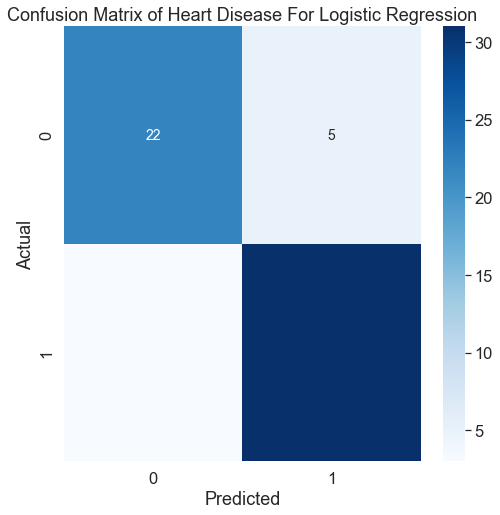

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [42]:
# Decision Trees

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model on the testing set - how well the model generalizes to unseen data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy Score: 0.8006802721088435
Accuracy Score on Test Set: 0.7704918032786885


true-negitive: 23 
false-positive: 4 
false-negative: 10 
true-positive: 24


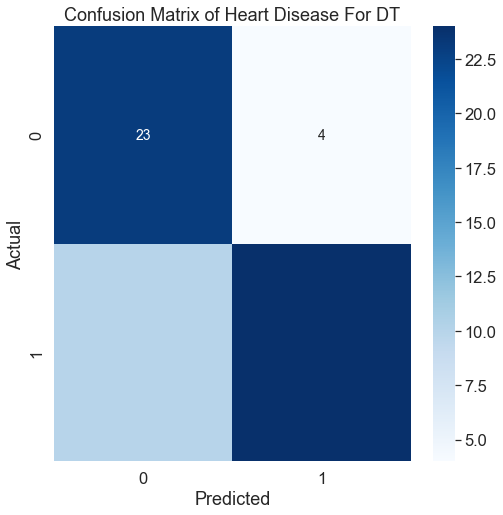

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For DT")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [44]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy Score: 0.833843537414966
Accuracy Score on Test Set: 0.8524590163934426


true-negitive: 22 
false-positive: 5 
false-negative: 4 
true-positive: 30


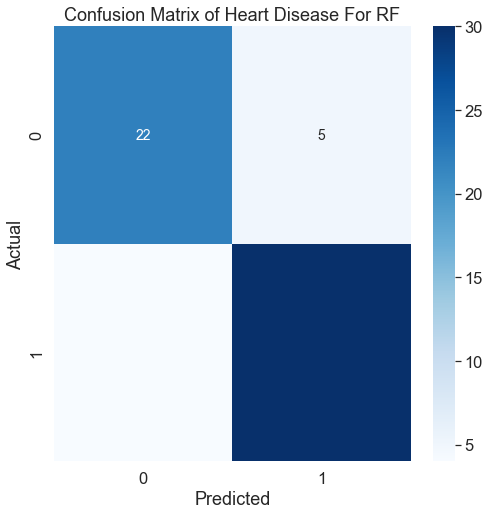

In [45]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For RF")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [46]:
# Define the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("Best Parameters (XGBoost):", best_params_xgb)
print("Best Accuracy Score (XGBoost):", best_score_xgb)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy Score on Test Set (XGBoost):", accuracy_xgb)

Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best Accuracy Score (XGBoost): 0.8296768707482993
Accuracy Score on Test Set (XGBoost): 0.8032786885245902


true-negitive: 22 
false-positive: 5 
false-negative: 4 
true-positive: 30


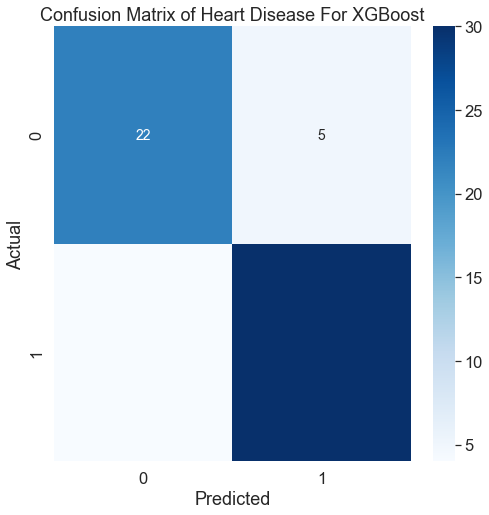

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For XGBoost")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
# Define the Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Define a parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation to find the best parameters
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters (SVM):", best_params_svm)
print("Best Accuracy Score (SVM):", best_score_svm)

# Train the SVM classifier with the best parameters
best_svm_classifier = SVC(**best_params_svm)
best_svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = best_svm_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score on Test Set (SVM):", accuracy_svm)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For SVM")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
# knn
# Define the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search with cross-validation to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters (KNN):", best_params_knn)
print("Best Accuracy Score (KNN):", best_score_knn)

# Train the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params_knn)
best_knn_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_knn = best_knn_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score on Test Set (KNN):", accuracy_knn)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For knn")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred_nb = nb_classifier.predict(X_train)

# Predict on the testing set
y_test_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model on the training set
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)

# Evaluate the model on the testing set
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)

print("Best Parameters (Naive Bayes):", {})  # No hyperparameters to tune for Naive Bayes
print("Accuracy Score on Training Set (Naive Bayes):", accuracy_train_nb)
print("Accuracy Score on Test Set (Naive Bayes):", accuracy_test_nb)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For NB")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )